In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#plt.rcParams['figure.figsize'] = [16, 7]

In [2]:
stats_brand = pd.read_csv('/data/ner_task/all_category/stats_brand.csv')

In [12]:
for l1_cat, df in stats_brand.groupby('main_category'):
    if l1_cat!='main_category':
        print ('l1_cat',l1_cat)
        df_plot = df.sort_values(by = 'num_count', ascending = False).head(20)
        print ('top 20 brand', df_plot.brand.tolist())

l1_cat Automotive
top 20 brand ['honda', 'yamaha', 'suzuki', 'kawasaki', 'mitsuyama', 'bluelans', 'kyt', 'ygp', 'toyota', 'tosso', 'branded', 'akrapovic', 'oem', 'tekiro', 'farfi', 'tdr', 'ink', 'ahm', 'lainnya', 'ride it']
l1_cat Baby & Kids Fashion
top 20 brand ['oshkosh', 'impor', "carter's", 'lokal', 'bluelans', 'little pineapple', 'sneakers', 'gap', 'mothercare', 'h&m', 'old navy', 'carters', 'gymboree', 'libby', 'velvet junior', 'next', 'afra kids', 'disney', 'london kids', 'oem']
l1_cat Beauty
top 20 brand ['wardah', 'etude house', 'oriflame', 'nature republic', 'laneige', 'innisfree', 'theraskin', 'maybelline', 'the body shop', 'wanita', 'jafra', 'bioaqua', 'nyx', 'sr12', 'ms glow', 'bluelans', 'focallure', 'unisex', 'the face shop', 'msi']
l1_cat Computer & Accessories
top 20 brand ['hp', 'asus', 'acer', 'sandisk', 'toshiba', 'lenovo', 'canon', 'logitech', 'epson', 'bluelans', 'dell', 'apple', 'samsung', 'oem', 'tplink', 'seagate', 'no', 'intel', 'huawei', 'orico']
l1_cat Cosm

In [8]:
df_plot

,main_category,brand,num_count
891972,Women Shoes,impor,86062
891973,Women Shoes,lokal,78621
891974,Women Shoes,adidas,16877
891975,Women Shoes,fila,15598
891976,Women Shoes,nike,14384
891977,Women Shoes,gucci,11093
891978,Women Shoes,kelsey,10422
891979,Women Shoes,emory,10005
891980,Women Shoes,monna vania,8169
891981,Women Shoes,nevada,8140


In [ ]:
# line plot for number of unique brand vs threshold(number of count)

0
5
10
15
20
25
30
35
40
45
50
100
200
300
400
500


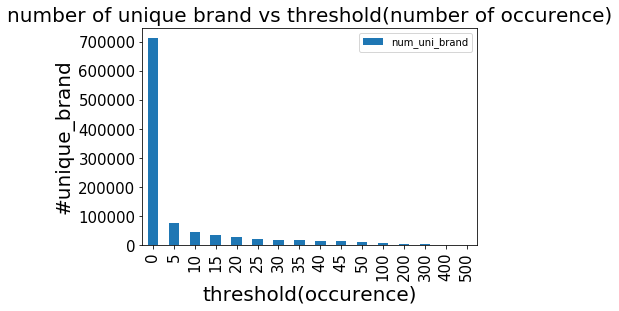

In [12]:
dict_plot = {'th':[],'num_uni_brand':[]}
for th in [0,5,10,15,20,25,30,35,40,45,50, 100, 200,300,400,500]:
    print (th)
    dict_plot['th'].append(th)
    num_uni_brand = stats_brand[stats_brand.num_count > th].brand.nunique()
    dict_plot['num_uni_brand'].append(num_uni_brand)
    
df = pd.DataFrame(dict_plot)
df[['num_uni_brand']].plot(kind = 'bar',fontsize =15)
plt.xticks(range(len(df.th.tolist())),df.th.tolist())
plt.ylabel('#unique_brand',fontsize =20)
plt.xlabel('threshold(occurence)',fontsize =20)
plt.title('number of unique brand vs threshold(number of occurence)', fontsize = 20)
plt.savefig('../data/eda_result/num_brand_distribution.pdf', bbox_inches="tight") # avoid to cut-off sth from the saved fig

In [11]:
df

,th,num_uni_brand
0,0,713238
1,5,77180
2,10,45974
3,15,33500
4,20,26667
5,25,22227
6,30,19088
7,35,16846
8,40,15118
9,45,13678


In [8]:
df.to_csv('../data/eda_result/unique_brand_distribution_over_th.csv')

In [ ]:
stats_brand[stats_brand.num_count > 1].shape

In [ ]:
stats_brand[stats_brand.num_count > 2].shape

In [ ]:
stats_brand[stats_brand.num_count > 3].shape

In [ ]:
stats_brand[stats_brand.num_count > 1].brand.nunique()

In [ ]:
stats_brand[stats_brand.num_count > 2].brand.nunique()

In [ ]:
stats_brand[stats_brand.num_count > 3].brand.nunique()

# Top 20 Brands for each Main Category

/home/linuxbrew/.linuxbrew/opt/python/lib/python3.6/site-packages/matplotlib/pyplot.py:537: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


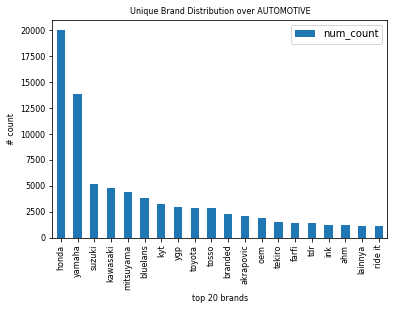

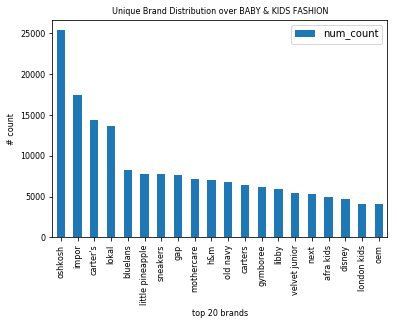

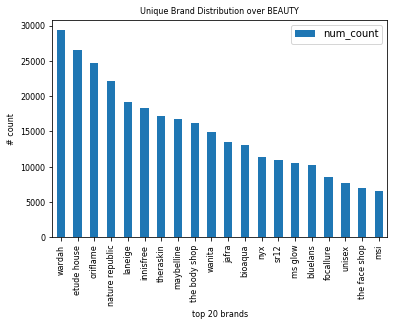

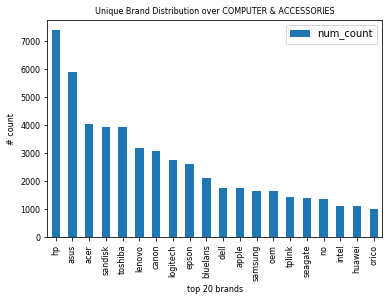

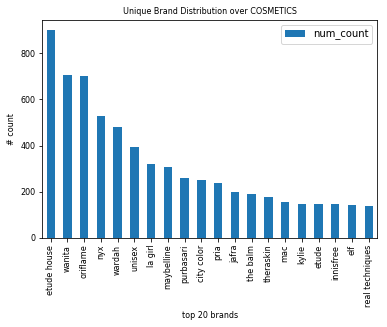

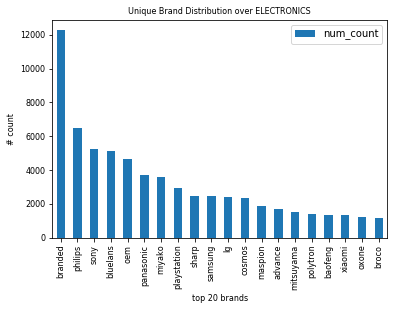

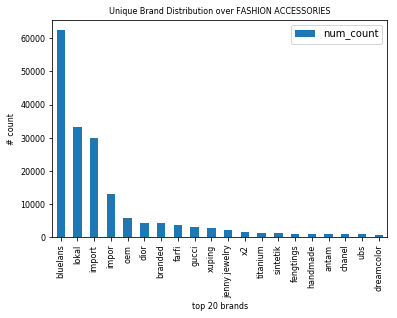

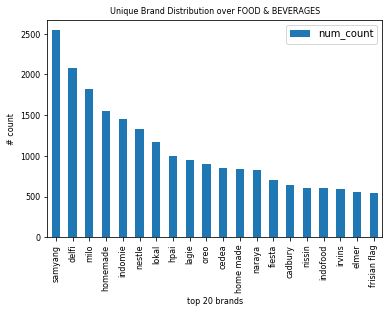

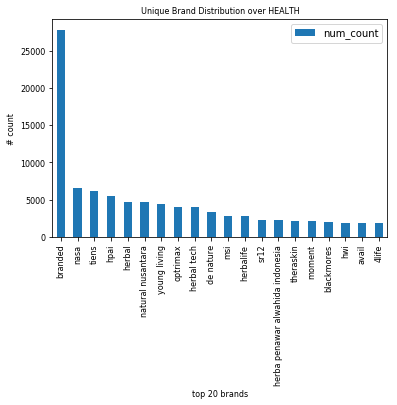

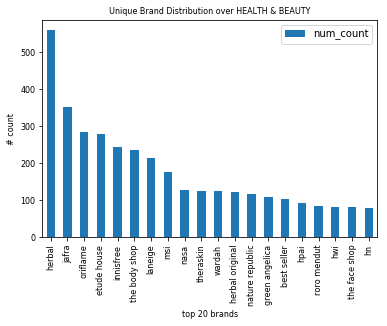

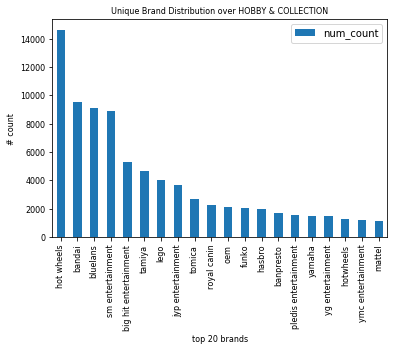

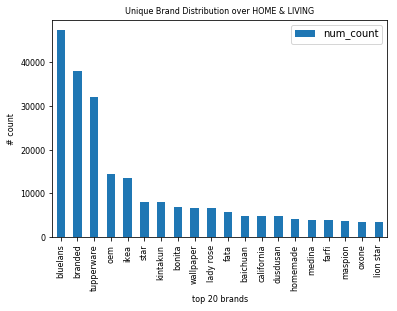

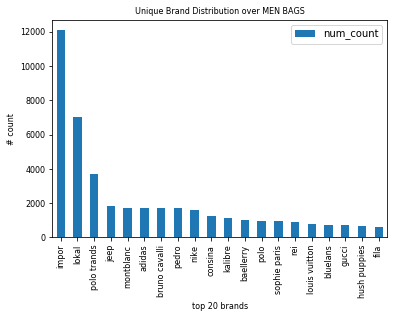

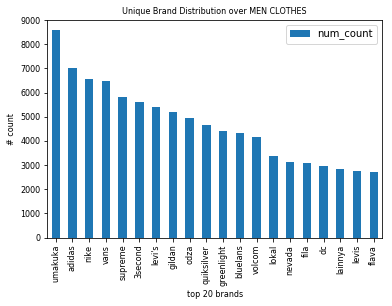

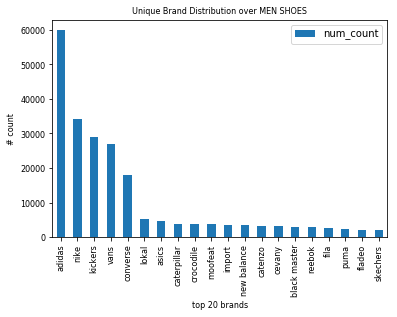

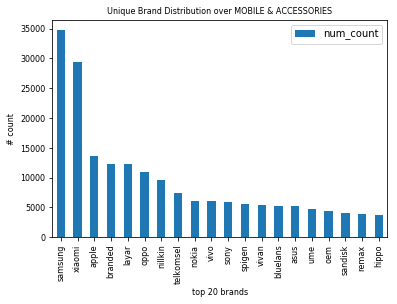

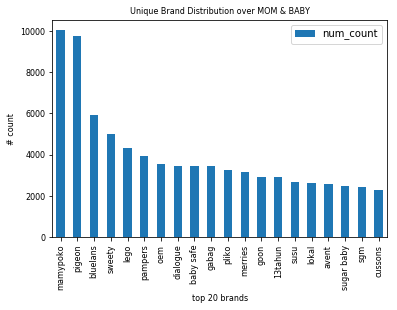

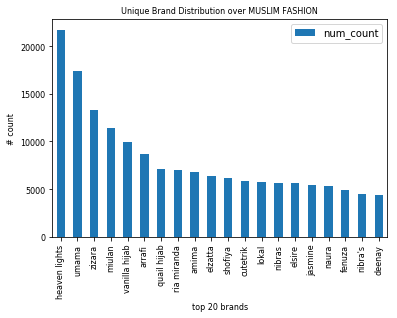

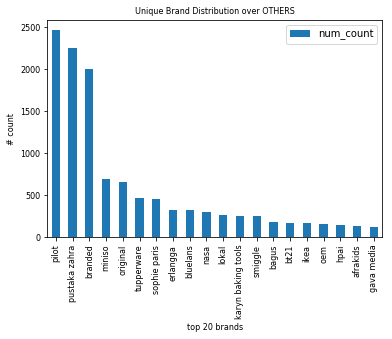

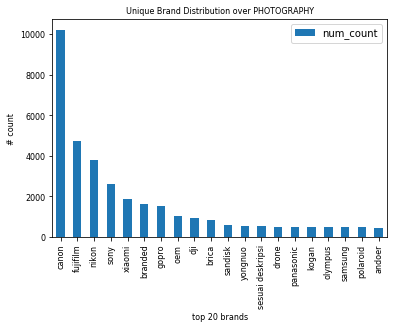

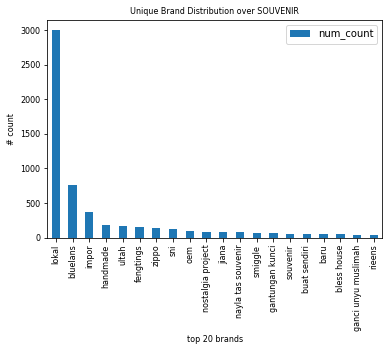

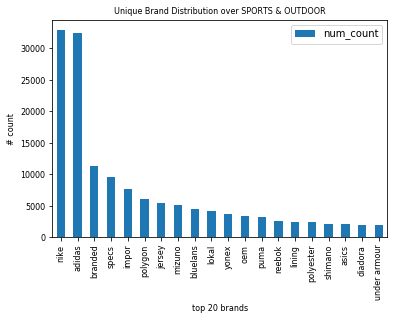

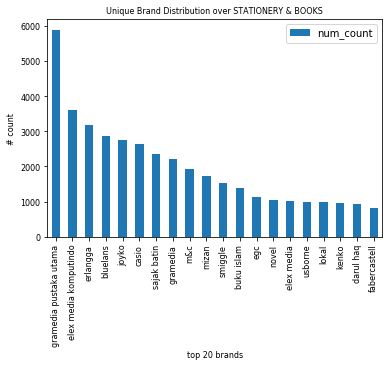

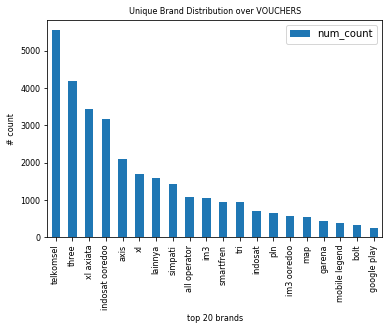

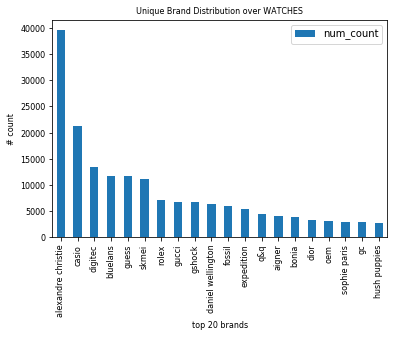

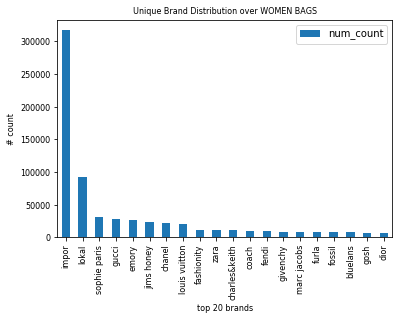

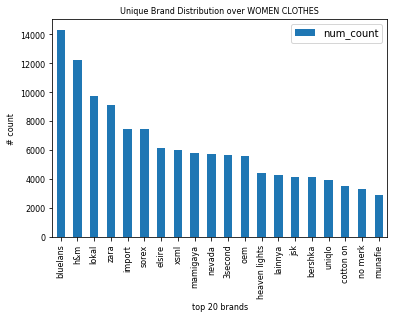

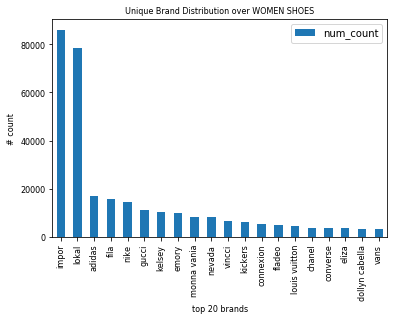

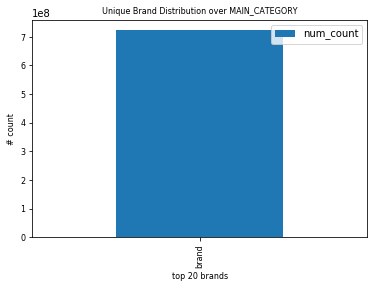

In [10]:
for l1_cat, df in stats_brand.groupby('main_category'):
    #print ('l1_cat',l1_cat)
    df_plot = df[df.num_count > 1].sort_values(by = 'num_count', ascending = False).head(20)
    df_plot.plot(kind='bar',
      fontsize =8,
      use_index = False 
      )
    plt.xticks(range(len(df_plot.brand.tolist())),df_plot.brand.tolist())
    plt.ylabel('# count',fontsize =8)
    plt.xlabel('top 20 brands',fontsize =8)
    plt.title('Unique Brand Distribution over {}'.format(l1_cat.upper()), fontsize = 8)
    plt.savefig('../data/eda_result/{}.pdf'.format(l1_cat.upper()), bbox_inches="tight") # avoid to cut-off sth from the saved fig

## remove symbols

In [ ]:
df2 = pd.DataFrame()
df2['brand'] = ['adidas', 'nike', "sk-II", "sk-2", '^()', 'a', '0','natural beauty']
df2

In [ ]:
df3 = pd.DataFrame(df2.brand.str.replace("[^a-zA-Z0-9&-' ']", ""))
df5 = df3[df3.brand.str.len()>1] # remove single character
print(df3)
print("="*10)
print(df5)

# cleaning is very important
### number of sku with brand and without brand(after cleaning)
### how many percentage of sku 1081559527 --> that's our potential we can improve listing quality 
### iluustrated by table is better
### sorting table is better, then we can understand which one is major brand
# number of sku and number of brands
# iterative data cleaning
# after iterative cleaning, I can provide data for Quanching for training model.


# with trained model, we can detect